We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

## Import Libraries

In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function


## Load and review data

In [2]:
cData = pd.read_csv("auto-mpg.csv")  
cData.shape

(398, 9)

In [3]:
# 8 variables: 
#
# MPG (miles per gallon), 
# cylinders, 
# engine displacement (cu. inches), 
# horsepower,
# vehicle weight (lbs.), 
# time to accelerate from O to 60 mph (sec.),
# model year (modulo 100), and 
# origin of car (1. American, 2. European,3. Japanese).
#
# Also provided are the car labels (types) 
# Missing data values are marked by series of question marks.


cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
#dropping/ignoring car_name 
cData = cData.drop('car name', axis=1)
# Also replacing the categorical var with actual values
cData['origin'] = cData['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


## Create Dummy Variables
Values like 'america' cannot be read into an equation. Using substitutes like 1 for america, 2 for europe and 3 for asia would end up implying that european cars fall exactly half way between american and asian cars! we dont want to impose such an baseless assumption!

So we create 3 simple true or false columns with titles equivalent to "Is this car America?", "Is this care European?" and "Is this car Asian?". These will be used as independent variables without imposing any kind of ordering between the three regions.




In [5]:
cData = pd.get_dummies(cData, columns=['origin'])
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,True,False,False


## Dealing with Missing Values

In [6]:
#A quick summary of the data columns
cData.describe()

,mpg,cylinders,displacement,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


In [7]:
cData.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [8]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
cData.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america       bool
origin_asia          bool
origin_europe        bool
dtype: object

In [9]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(cData.horsepower.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
cData[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,True,False,False
126,21.0,6,200.0,?,2875,17.0,74,True,False,False
330,40.9,4,85.0,?,1835,17.3,80,False,False,True
336,23.6,4,140.0,?,2905,14.3,80,True,False,False
354,34.5,4,100.0,?,2320,15.8,81,False,False,True
374,23.0,4,151.0,?,3035,20.5,82,True,False,False


In [17]:
# Missing values have a'?''
# Replace missing values with NaN
cData = cData.replace('?', np.nan)
cData[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,True,False,False
126,21.0,6,200.0,NaN,2875,17.0,74,True,False,False
330,40.9,4,85.0,NaN,1835,17.3,80,False,False,True
336,23.6,4,140.0,NaN,2905,14.3,80,True,False,False
354,34.5,4,100.0,NaN,2320,15.8,81,False,False,True
374,23.0,4,151.0,NaN,3035,20.5,82,True,False,False


There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations


In [13]:
#instead of dropping the rows, lets replace the missing values with median value. 
cData.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: object

In [18]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median()) #single line function which takes one input x and returns nan value substite for that value in a series
cData = cData.apply(medianFiller,axis=0) #how we can apply a function on each column

cData['horsepower'] = cData['horsepower'].astype('float64')  # converting the hp column from object / string type to float


In [19]:
hpIsDigit

,horsepower
0,True
1,True
2,True
3,True
4,True
...,...
393,True
394,True
395,True
396,True


In [20]:
hpIsDigit[hpIsDigit['horsepower'] == False]

,horsepower
32,False
126,False
330,False
336,False
354,False
374,False


In [21]:
cData[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,93.5,2046,19.0,71,True,False,False
126,21.0,6,200.0,93.5,2875,17.0,74,True,False,False
330,40.9,4,85.0,93.5,1835,17.3,80,False,False,True
336,23.6,4,140.0,93.5,2905,14.3,80,True,False,False
354,34.5,4,100.0,93.5,2320,15.8,81,False,False,True
374,23.0,4,151.0,93.5,3035,20.5,82,True,False,False


## BiVariate Plots

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file. 

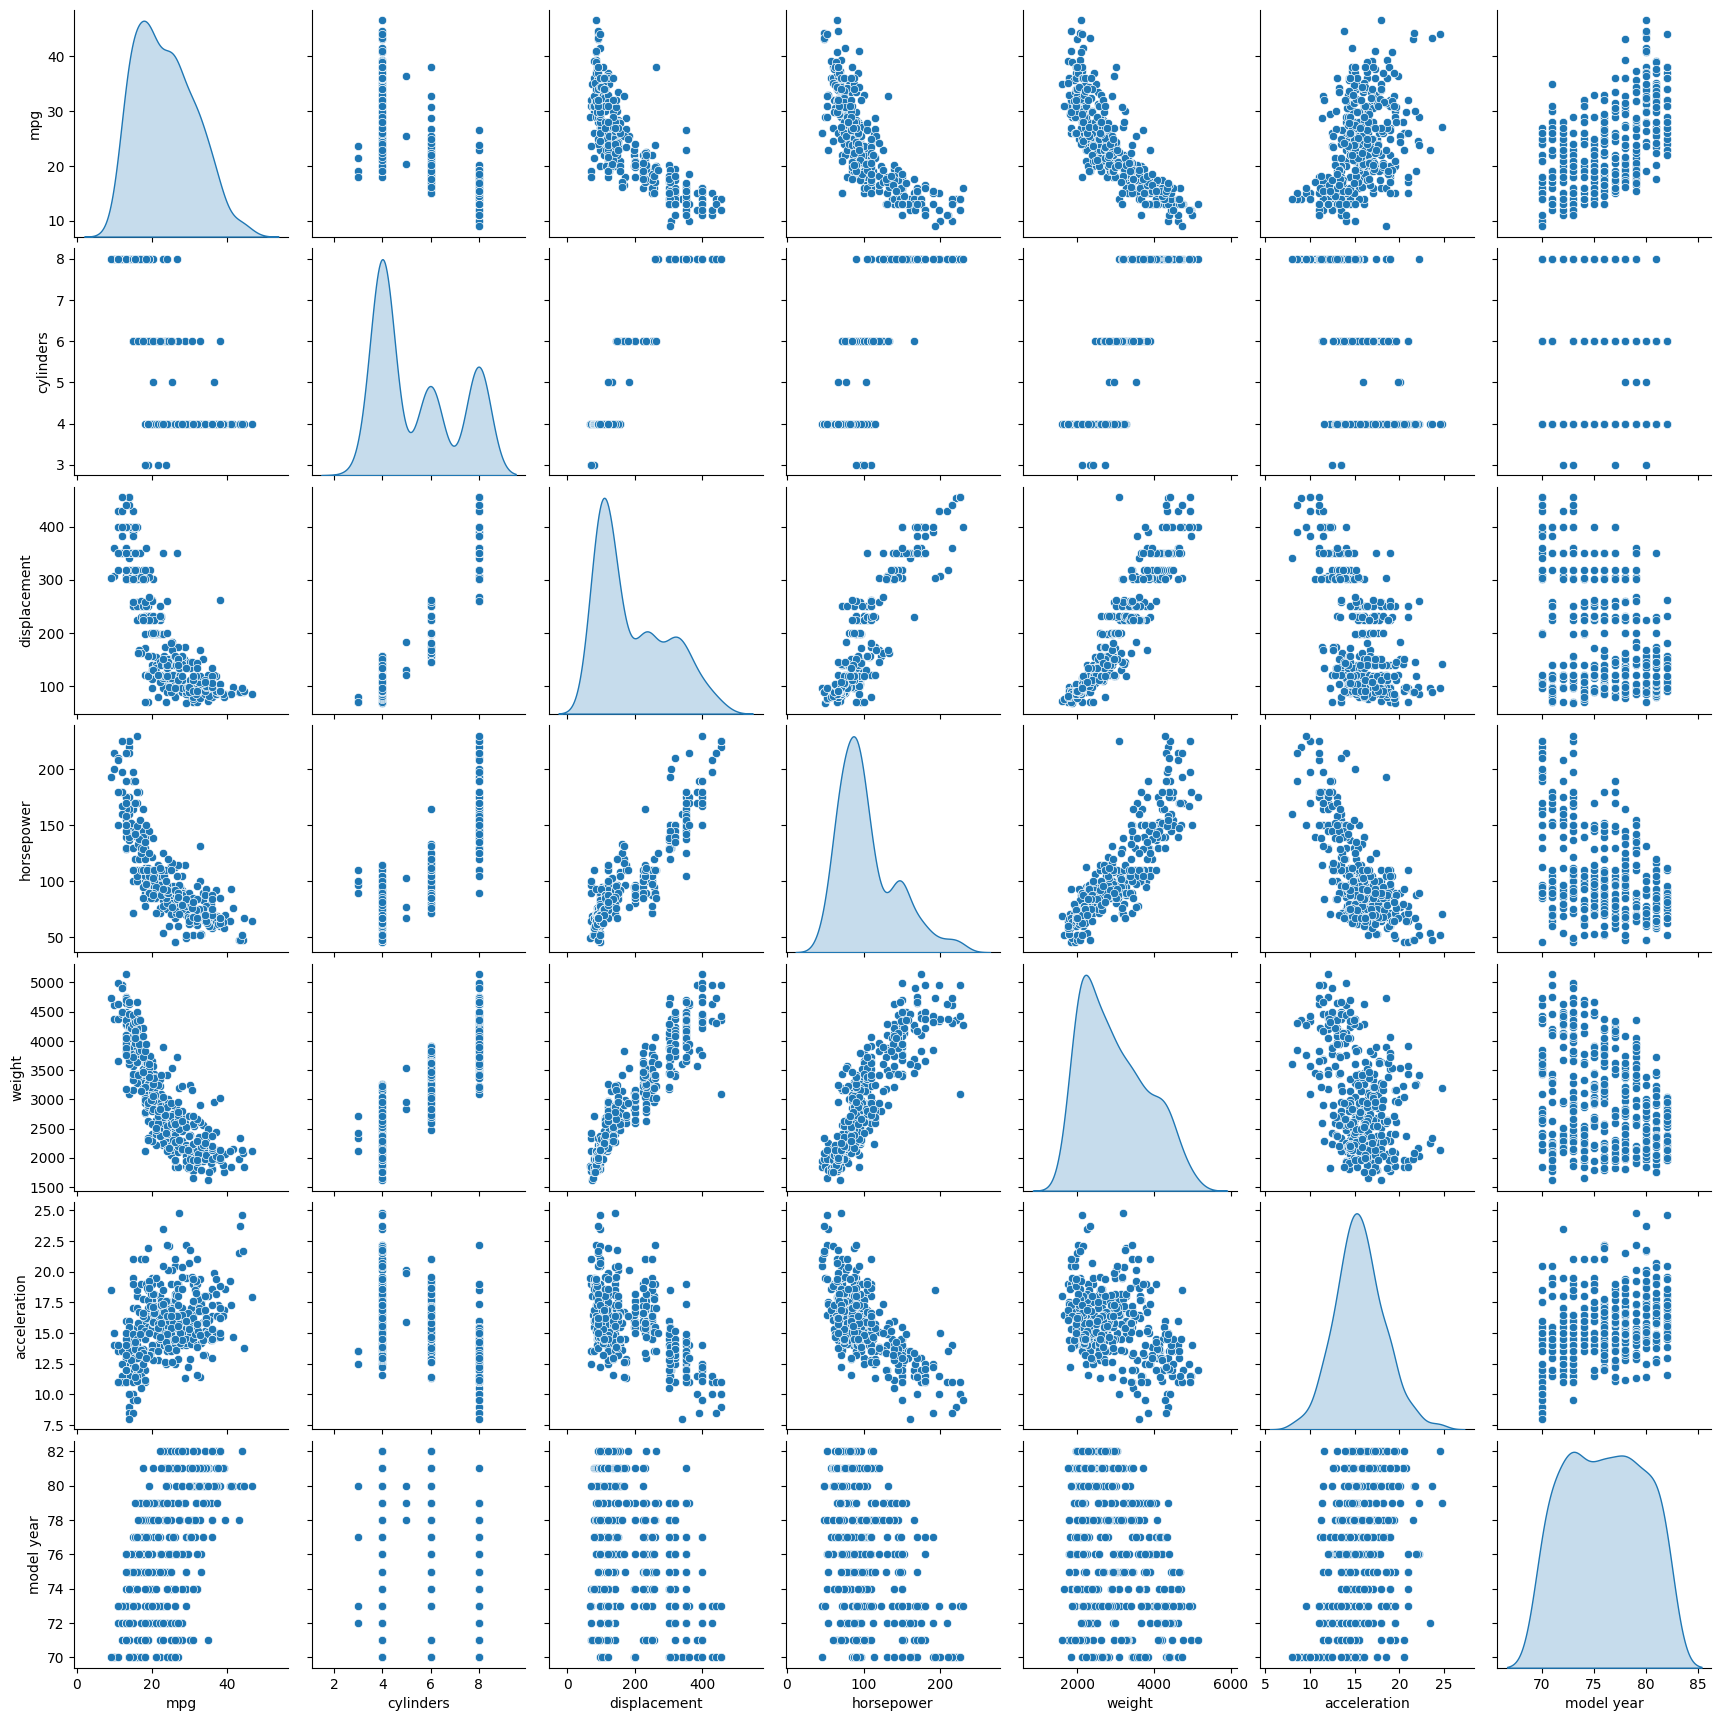

In [22]:
cData_attr = cData.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

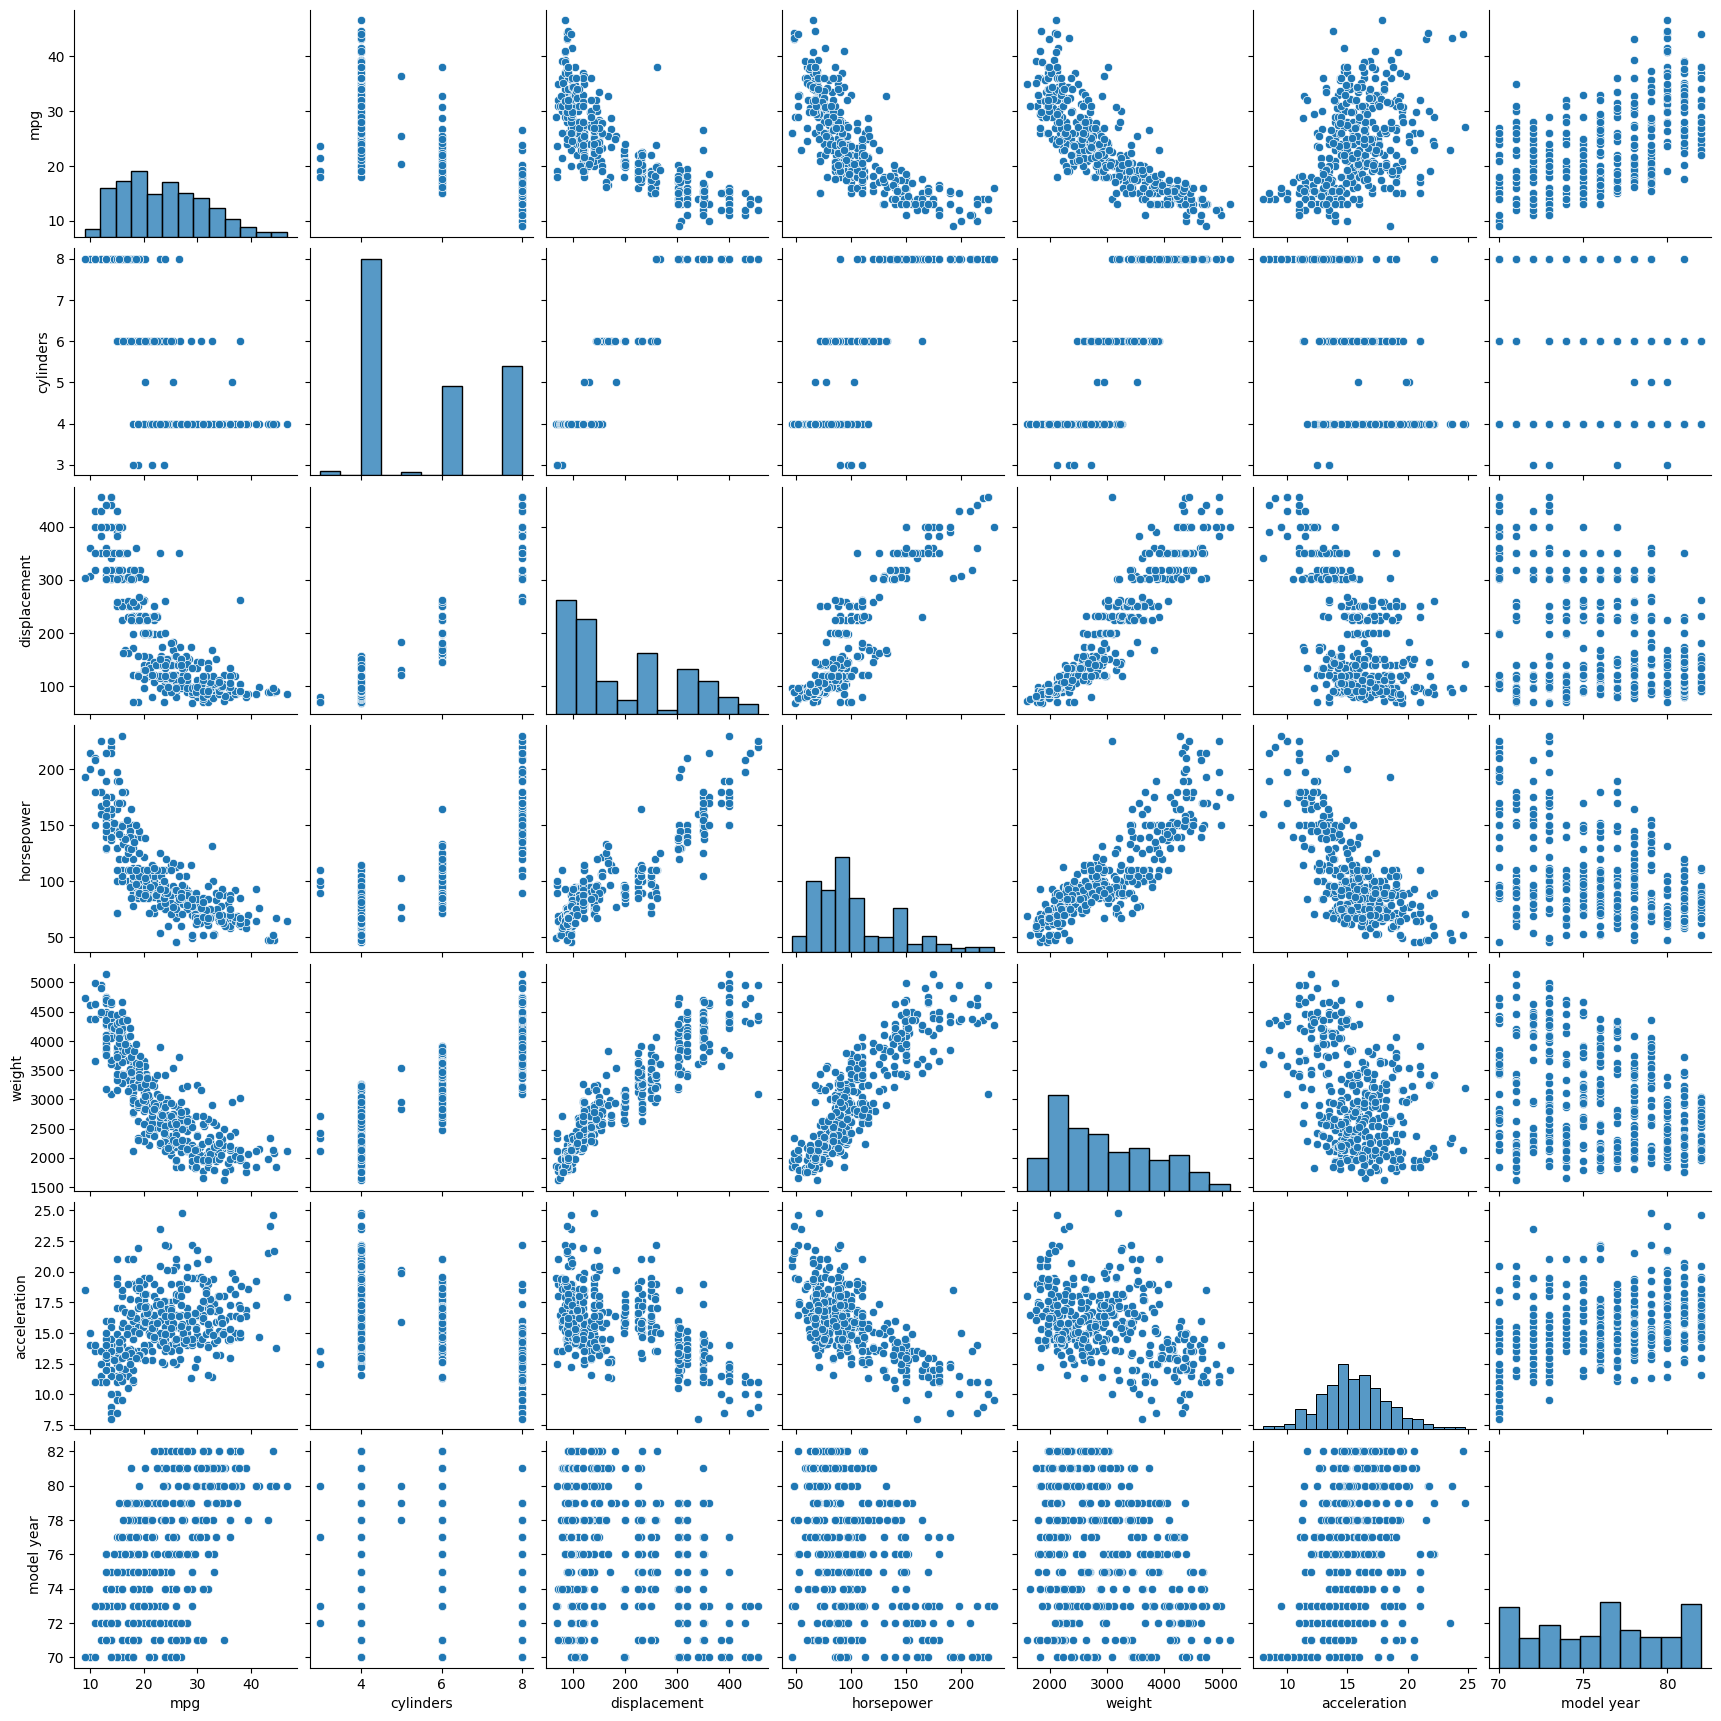

In [23]:
sns.pairplot(cData_attr)   # to plot density histogram instead of density curve on the diag

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity


Necessary and advisory to do some EDA and statistics before Model building. Statistician make assumption that data comes from a and therefore finding th ebest linear model is what we care aboput but as a machine learner, I dont care about wheather the data came from a linear model I have the data and all I want is a best linear fit for the data. BY splitting into training and testing data; Statitions model building include assumptions that include independence among data and variance among data points;  lot of assumptions. However in ML we care about fitting the best linear model and finding the best hyper plane line or best fit line to play well on the testing data.

## Split Data

In [24]:
# lets build our linear model
# independant variables and unnecessary dummpy variables dropping off 
X = cData.drop(['mpg','origin_europe'], axis=1)
# the dependent variable
y = cData[['mpg']]

In [25]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) #training size 70%

## Fit Linear Model

In [26]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

Here are the coefficients for each variable and the intercept

In [27]:
for idx, col_name in enumerate(X_train.columns):
    print("haribol",idx,col_name)
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

haribol 0 cylinders
The coefficient for cylinders is -0.39480796616482383
haribol 1 displacement
The coefficient for displacement is 0.02894551076548718
haribol 2 horsepower
The coefficient for horsepower is -0.021752207723546777
haribol 3 weight
The coefficient for weight is -0.007352032065147351
haribol 4 acceleration
The coefficient for acceleration is 0.061919366007618756
haribol 5 model year
The coefficient for model year is 0.836933891764499
haribol 6 origin_america
The coefficient for origin_america is -3.001283000918514
haribol 7 origin_asia
The coefficient for origin_asia is -0.6060179643247368


In [28]:
regression_model.coef_[0][1]

0.02894551076548718

In [31]:
regression_model.coef_[0]

array([-0.39480797,  0.02894551, -0.02175221, -0.00735203,  0.06191937,
        0.83693389, -3.001283  , -0.60601796])

In [36]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -18.283451116372046


ML effort on predictibility not on inference

The score (R^2) for in-sample and out of sample

In [37]:
regression_model.score(X_train, y_train)

0.8141025501610559

81% of all the variable in the training data is explained by this model but R2 in the testing data is what matters the most

In [38]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)


0.8433135132808833

## Adding interaction terms 


Adding different kind of NON linearity and trying it for eg POlynomial feature of degree 2

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True) #not including square terms but only including interaction terms like x1*x2, x2*x3
X_train2 = poly.fit_transform(X_train) #creaating new linear model with more number of columns due to including interaction terms 
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9015975293555899


Adding columns will either sightly incerease the coorelation or with a higher magnitude because its adding to the previous columns and hence insamole R2 will also bound to increase. However out of sample R2 may or maynot increase but if it does then adding columns or variable.. can be considered or not depending on the user to include the complex model and a better R2 score than a simple model with a lil R2 score.  

In [42]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.864744106211629


In [43]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(278, 8)
(278, 37)


Polynomial Features (with only interaction terms) have improved the Out of sample R^2. However at the cost of increaing the number of variables significantly. 
